data set info
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:-
1.sepal length in cm
2.sepal width in cm
3.petal length in cm
4.petal width in cm
5.species
6.Iris Setosa
7.Iris Versicolour
8.Iris Virginica

In [2]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #to manipulate warnings details
warnings.filterwarnings('ignore') # is to ignore the warnings thrown by the modules (gives clean results)

loading the csv data

In [3]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#delete ID column
df=df.drop(columns='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#displaying statistics of the data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#basic info about the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#displaying number of samples of each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

preprocessing the dataset

In [8]:
#checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Exploratory Data Analysis
visualizing the data with different kinds of plots for inference.

<Axes: >

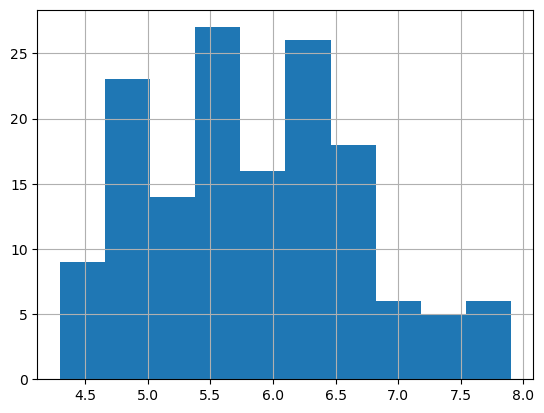

In [9]:
df['SepalLengthCm'].hist()

<Axes: >

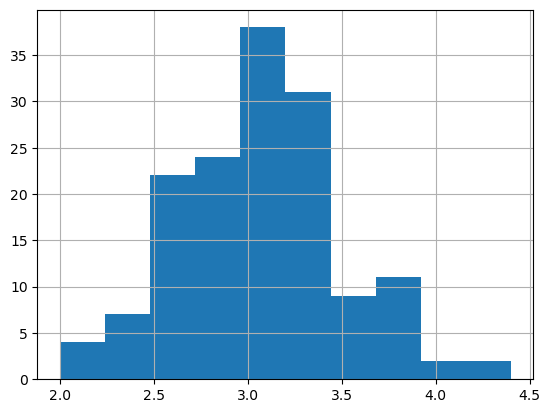

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

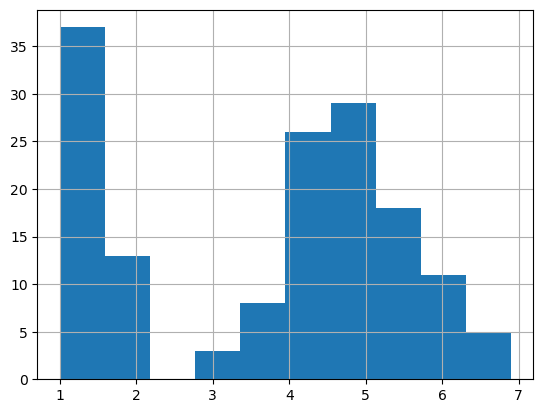

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

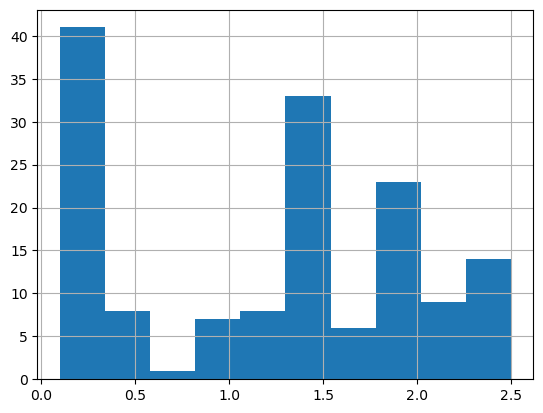

In [12]:
df['PetalWidthCm'].hist()

Sepal Length and Sepal Width forming a normal distritbution

Petal Length and Petal Width have two separate bells, it's due to the measurements of different species

In [13]:
#creating list of colors and class labels
colors=['red','orange','blue']
species=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

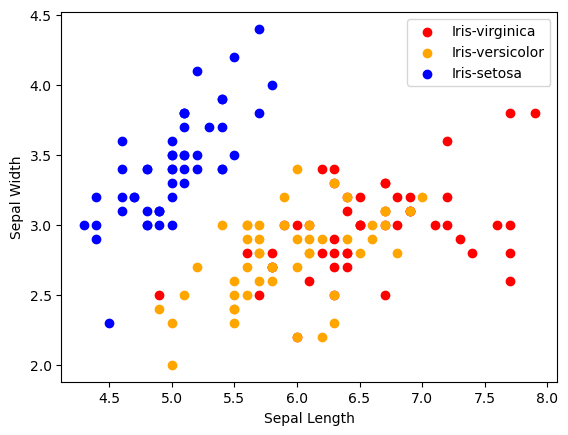

In [14]:
for i in range(3):
    #filtering data on each class
    x=df[df['Species']==species[i]]#checks if the selected species matches with current species
    #plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

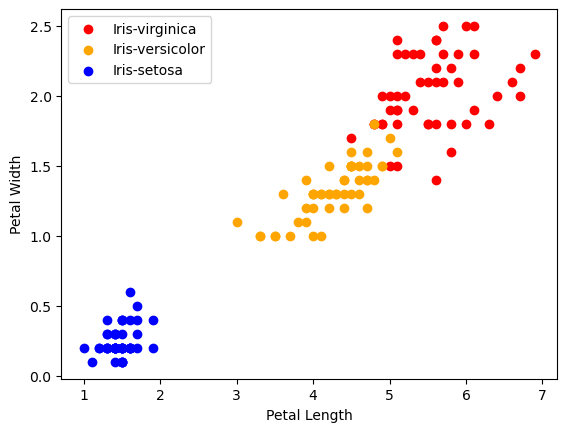

In [15]:
#petal length and width
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

Text(0, 0.5, 'Petal Length')

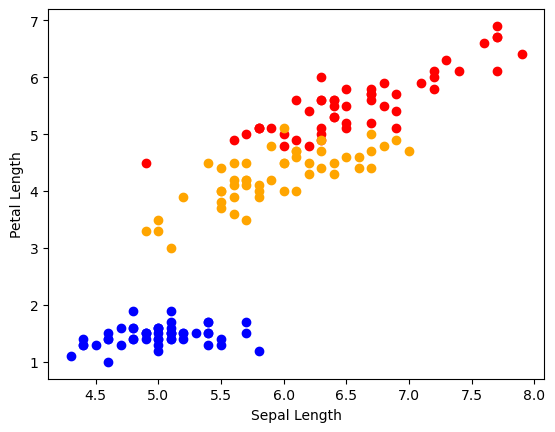

In [16]:
#sepal length and petal length
for i in range(3):
    x=df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
#plt.legend()

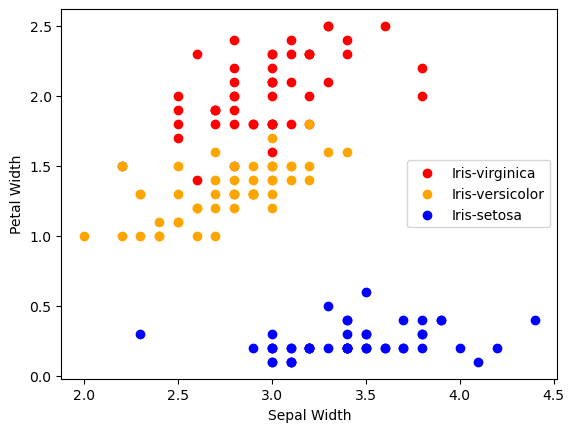

In [17]:
#sepal width and petal width
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

Here we can see, iris-setosa is easily separable from the other 2 classes

In petal length and petal width plot, the classes plotted without overlapping

In other plots, some samples are overlapping with other classes

In [18]:
#displaying correlation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

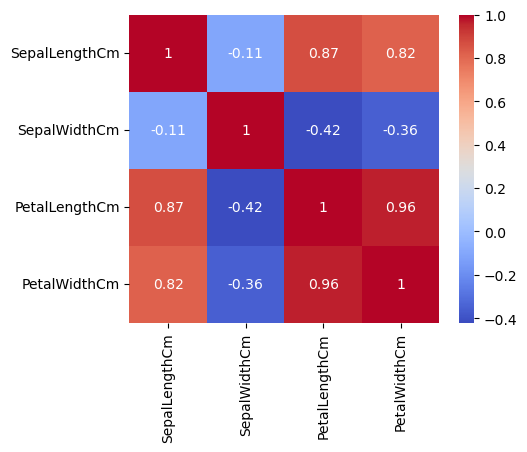

In [19]:
#plotting heat map
corr=df.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

Petal length and petal width have high positive correlation of 0.96

If petal length value increases, petal width also increases

Sepal length have high positive correlation with petal length and petal width

Sepal width have negative correlation with petal length and petal width

Label Encoding: converting the labels into numeric form so as to convert it into the machine-readable form.

In [20]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#transform the string labels to integer
#df['Species']=le.fit_transform(df['Species'])
#df.head()

Model training and testing

In [21]:
from sklearn.model_selection import train_test_split
##train-70%
##test-30%

#input data
X=df.drop(columns=['Species'])
#output data
Y=df['Species']
#split the data for train and test
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.30)#this will split data for training and testing

importing various models

In [22]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [23]:
#model training
model.fit(x_train, y_train)#fit trains the model using the data

LogisticRegression()

In [24]:
#printing metric to get performance
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556


In [25]:
#using knn(k-nearest neigbours)
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train, y_train)
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556


In [26]:
#using decision trees
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train, y_train)
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556


In [31]:
#save the model
import pickle
filename= 'iris_model.sav'
pickle.dump(model, open(filename, 'wb')) #wb= write binary

In [32]:
import pickle
filename= 'iris_model.sav'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved successfully")
except:
    print(f"Error saving the model: {e}")

Model saved successfully


In [33]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
102,7.1,3.0,5.9,2.1
75,6.6,3.0,4.4,1.4
112,6.8,3.0,5.5,2.1
65,6.7,3.1,4.4,1.4
130,7.4,2.8,6.1,1.9


In [34]:
load_model=pickle.load(open(filename, 'rb')) #rb= read binary

In [35]:
load_model.predict([[7.3, 2.9, 6.3, 1.8]])

array(['Iris-virginica'], dtype=object)